In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [2]:
data=pd.read_excel("Airlines+Data.xlsx")
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
 2   month       96 non-null     object        
 3   year        96 non-null     object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.1+ KB


In [6]:
data["month"]=data["Month"].dt.strftime("%b")
data["year"]=data["Month"].dt.strftime("%y")

In [7]:
data.head()

,Month,Passengers,month,year
0,1995-01-01,112,Jan,95
1,1995-02-01,118,Feb,95
2,1995-03-01,132,Mar,95
3,1995-04-01,129,Apr,95
4,1995-05-01,121,May,95


In [9]:
data["t"]=np.arange(1,97)

In [10]:
data["t_squared"]=data["t"]*data["t"]

In [12]:
data["log_passengers"]=np.log(data["Passengers"])

In [13]:
month_dummies=pd.get_dummies(data["month"])

In [15]:
month_dummies.head()

,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0


In [16]:
data1=pd.concat([data,month_dummies],axis=1)
data1

,Month,Passengers,month,year,t,t_squared,log_passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,95,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,95,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,95,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,95,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,95,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,2002-08-01,405,Aug,02,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,02,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,02,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,02,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0


<AxesSubplot:xlabel='year', ylabel='Passengers'>

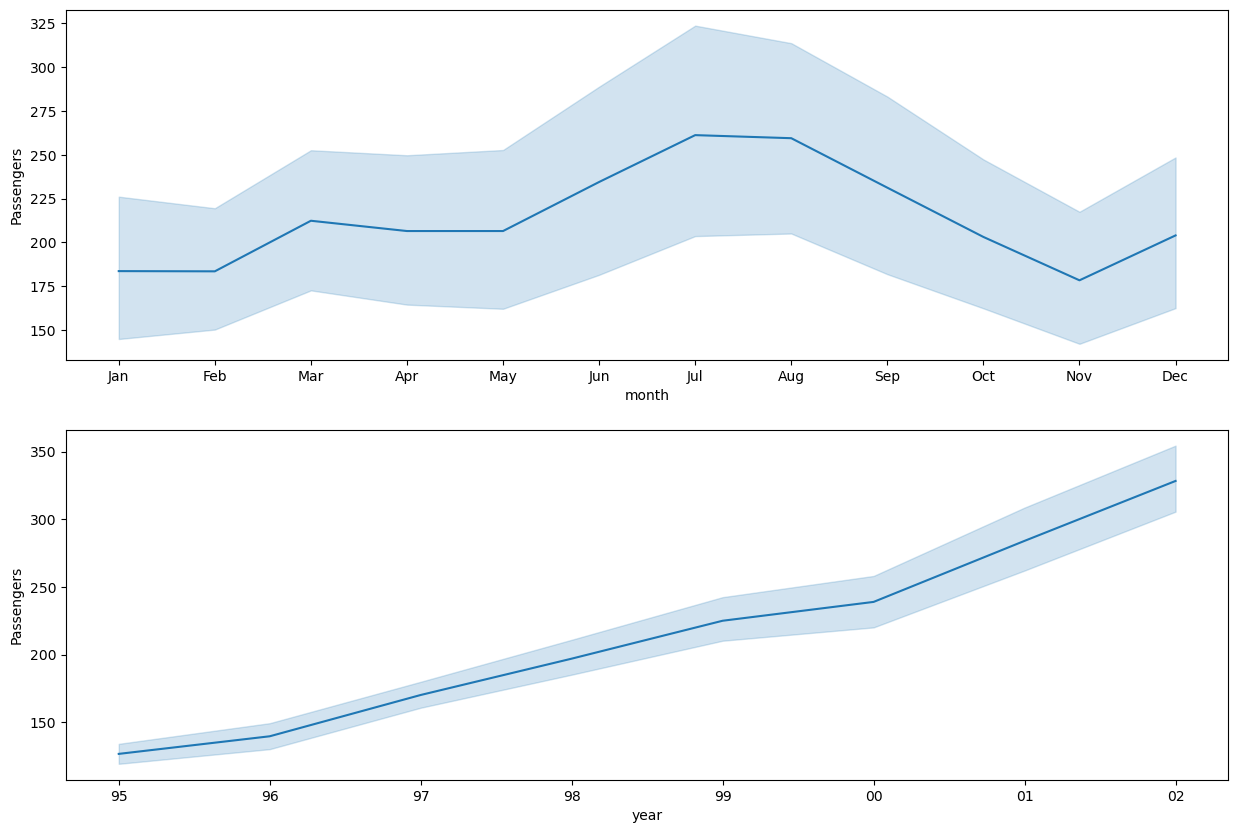

In [22]:
plt.figure(figsize=(15,10))
plt.subplot(2,1,1)
sns.lineplot(x="month",y="Passengers",data=data1)
plt.subplot(2,1,2)
sns.lineplot(x="year",y="Passengers",data=data1)

<AxesSubplot:xlabel='year', ylabel='month'>

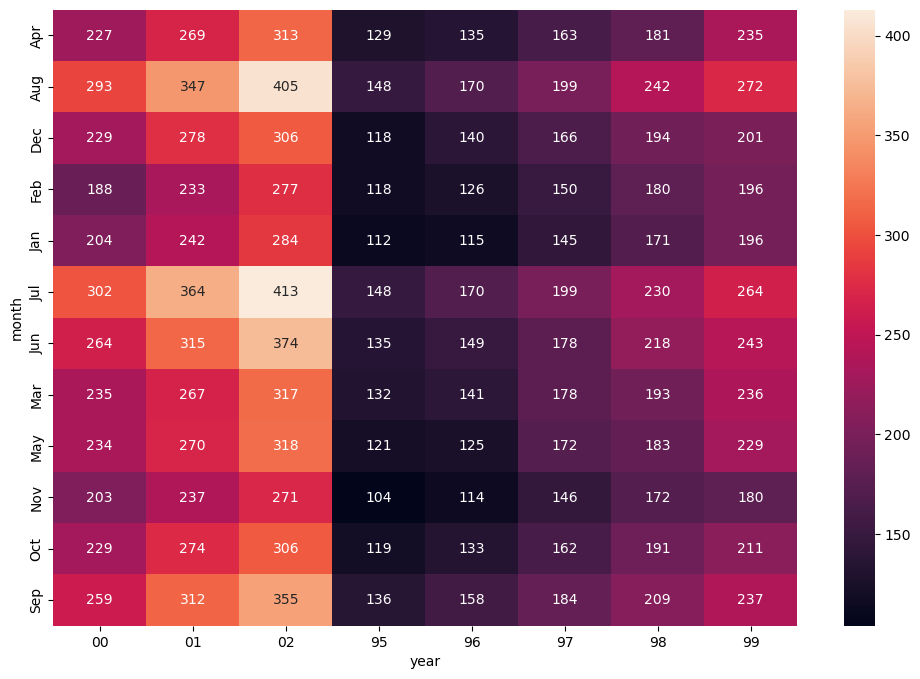

In [26]:
plt.figure(figsize=(12,8))
heatmap = pd.pivot_table(data=data1,values="Passengers",index="month",columns="year",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap,annot=True,fmt="g")

D:\New folder\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Passengers', ylabel='Density'>

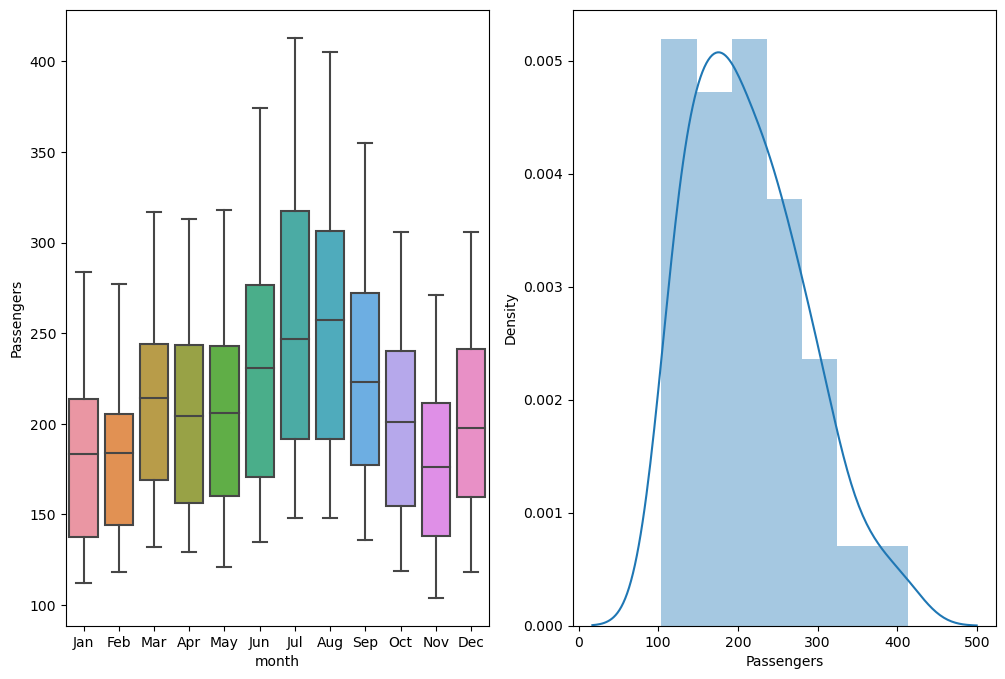

In [32]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
sns.boxplot(x="month",y="Passengers",data=data1)
plt.subplot(1,2,2)
sns.distplot(data1["Passengers"])

In [33]:
train_data=data1.head(76)
test_data=data1.tail(26)

In [34]:
data1.head()

,Month,Passengers,month,year,t,t_squared,log_passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,1995-01-01,112,Jan,95,1,1,4.718499,0,0,0,0,1,0,0,0,0,0,0,0
1,1995-02-01,118,Feb,95,2,4,4.770685,0,0,0,1,0,0,0,0,0,0,0,0
2,1995-03-01,132,Mar,95,3,9,4.882802,0,0,0,0,0,0,0,1,0,0,0,0
3,1995-04-01,129,Apr,95,4,16,4.859812,1,0,0,0,0,0,0,0,0,0,0,0
4,1995-05-01,121,May,95,5,25,4.795791,0,0,0,0,0,0,0,0,1,0,0,0


LINEAR MODEL

In [36]:
linear_model=ols("Passengers~t",data=train_data).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(test_data['t'])))
rmse_linear = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_linear))**2))
rmse_linear

51.3713499775503

EXPONENTIAL MODEL

In [37]:
exp_model=ols("log_passengers~t",data=train_data).fit()
pred_exp =  pd.Series(exp_model.predict(pd.DataFrame(test_data['t'])))
rmse_exp = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_exp)))**2))
rmse_exp

43.24586006299161

QUADRATIC MODEL

In [38]:
quad_model = ols('Passengers~t+t_squared',data=train_data).fit()
pred_quad =  pd.Series(quad_model.predict(pd.DataFrame(test_data[["t","t_squared"]])))
rmse_quad = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_quad))**2))
rmse_quad

52.600935100719624

ADDITIVE SEASONALITY

In [39]:
add_model=ols("Passengers~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep",data=train_data).fit()
pred_add =  pd.Series(add_model.predict(pd.DataFrame(test_data[["Apr","Aug","Dec","Feb","Jan","Jul","Jun","Mar","May","Nov","Oct","Sep"]])))
rmse_add = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_add))**2))
rmse_add

120.15641651454983

ADDITIVE SEASONALITY QUADRATIC

In [41]:
add_quad_model=ols("Passengers~t+t_squared+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep",data=train_data).fit()
pred_add_quad =  pd.Series(add_quad_model.predict(pd.DataFrame(test_data[["Apr","Aug","Dec","Feb","Jan","Jul","Jun","Mar","May","Nov","Oct","Sep","t","t_squared"]])))
rmse_add_quad = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(pred_add_quad))**2))
rmse_add_quad

35.020467372236666

MULTIPLICATIVE SEASONALITY

In [42]:
mul_model=ols("log_passengers~Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep",data=train_data).fit()
pred_mul =  pd.Series(mul_model.predict(pd.DataFrame(test_data)))
rmse_mul = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_mul)))**2))
rmse_mul

125.35905492624077

MULTIPLICATIVE ADDITIVE SEASONALITY

In [43]:
mul_add_model=ols("log_passengers~t+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep",data=train_data).fit()
pred_mul_add =  pd.Series(mul_add_model.predict(pd.DataFrame(test_data)))
rmse_mul_add = np.sqrt(np.mean((np.array(test_data['Passengers'])-np.array(np.exp(pred_mul_add)))**2))
rmse_mul_add

11.48796951864585

COMPARING THE RESULTS

In [44]:
rmse_df=pd.DataFrame({"methods":["linear_model","exp_model","quad_model","add_model","add_quad_model","mul_model","mul_add_model"],"rmse_values":[rmse_linear,rmse_exp,rmse_quad,rmse_add,rmse_add_quad,rmse_mul,rmse_mul_add]})
rmse_df

,methods,rmse_values
0,linear_model,51.371350
1,exp_model,43.245860
2,quad_model,52.600935
3,add_model,120.156417
4,add_quad_model,35.020467
5,mul_model,125.359055
6,mul_add_model,11.487970


In [46]:
rmse_df.sort_values(by="rmse_values",ascending=True)

,methods,rmse_values
6,mul_add_model,11.487970
4,add_quad_model,35.020467
1,exp_model,43.245860
0,linear_model,51.371350
2,quad_model,52.600935
3,add_model,120.156417
5,mul_model,125.359055


BUILDING THE MODEL ON ENTIRE DATASET USING MULTIPLICATIVE ADDITIVE SEASONALITY AS IT HAS LEAST RMSE VALUE

In [47]:
model=ols("log_passengers~t+Apr+Aug+Dec+Feb+Jan+Jul+Jun+Mar+May+Nov+Oct+Sep",data=data1).fit()

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         log_passengers   R-squared:                       0.983
Model:                            OLS   Adj. R-squared:                  0.980
Method:                 Least Squares   F-statistic:                     396.6
Date:                Wed, 08 Feb 2023   Prob (F-statistic):           6.90e-68
Time:                        16:25:28   Log-Likelihood:                 164.35
No. Observations:                  96   AIC:                            -302.7
Df Residuals:                      83   BIC:                            -269.4
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.3983      0.009    490.162      0.000       4.380       4.416
t              0.0112      0.000     64.390      0.000       0.011       0.012
Apr            0.3706      0.016     23.300      0.000       0.339       0.402
Aug            0.5472      0.016     34.347      0.000       0.515       0.579
Dec            0.2680      0.016     16.765      0.000       0.236       0.300
Feb            0.2827      0.016     17.777      0.000       0.251       0.314
Jan            0.2834      0.016     17.818      0.000       0.252       0.315
Jul            0.5605      0.016     35.204      0.000       0.529       0.592
Jun            0.4655      0.016     29.249      0.000       0.434       0.497
Mar            0.4147      0.016     26.074      0.000       0.383       0.446
May            0.3529      0.016     22.180      0.000       0.321       0.385
Nov            0.1427      0.016      8.935      0.000       0.111       0.174
Oct            0.2844      0.016     17.823      0.000       0.253       0.316
Sep            0.4257      0.016     26.704      0.000       0.394       0.457
==============================================================================
Omnibus:                        1.637   Durbin-Watson:                   0.646
Prob(Omnibus):                  0.441   Jarque-Bera (JB):                1.075
Skew:                          -0.141   Prob(JB):                        0.584
Kurtosis:                       3.435   Cond. No.                     7.43e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.42e-31. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [50]:
data1.tail()

,Month,Passengers,month,year,t,t_squared,log_passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
91,2002-08-01,405,Aug,02,92,8464,6.003887,0,1,0,0,0,0,0,0,0,0,0,0
92,2002-09-01,355,Sep,02,93,8649,5.872118,0,0,0,0,0,0,0,0,0,0,0,1
93,2002-10-01,306,Oct,02,94,8836,5.723585,0,0,0,0,0,0,0,0,0,0,1,0
94,2002-11-01,271,Nov,02,95,9025,5.602119,0,0,0,0,0,0,0,0,0,1,0,0
95,2002-12-01,306,Dec,02,96,9216,5.723585,0,0,1,0,0,0,0,0,0,0,0,0


In [54]:
forecast=pd.DataFrame({"t":97,"Apr":0,"Aug":0,"Dec":0,"Feb":0,"Jan":1,"Jul":0,"Jun":0,"Mar":0,"May":0,"Nov":0,"Oct":0,"Sep":0},index=[0])

In [67]:
forecast

,t,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep
0,97,0,0,0,0,1,0,0,0,0,0,0,0


passengers for jan1 2003

In [73]:
Passengers=np.exp(model.predict(forecast))
Passengers

0    320.779889
dtype: float64